https://a.travel-assets.com/findyours-php/viewfinder/images/res40/191000/191408-Ipanema-Beach.jpg
(576, 1024, 3)
https://upload.wikimedia.org/wikipedia/commons/0/03/Working_Uniform.jpg
(1260, 600, 3)
https://img-s-msn-com.akamaized.net/tenant/amp/entityid/AAEoBYQ.img?h=414&w=620&m=6&q=60&o=f&l=f
(414, 620, 3)
https://www.wikihow.com/images/thumb/4/43/Prepare-and-Cook-Salmon-Step-5.jpg/aid1475325-v4-728px-Prepare-and-Cook-Salmon-Step-5.jpg
(485, 728, 3)
https://d.newsweek.com/en/full/545196/trump-inauguration-07-0120.jpg?w=737&f=aad8c3a9abb77e478e3f486e963f55c8
(491, 737, 3)
https://a57.foxnews.com/media2.foxnews.com/BrightCove/694940094001/2018/11/15/931/524/694940094001_5967519394001_5967518878001-vs.jpg?ve=1&tl=1
(524, 931, 3)


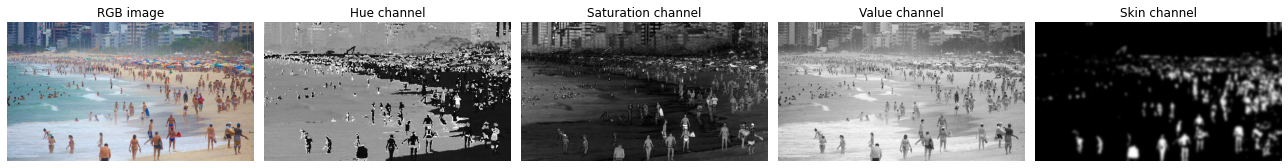

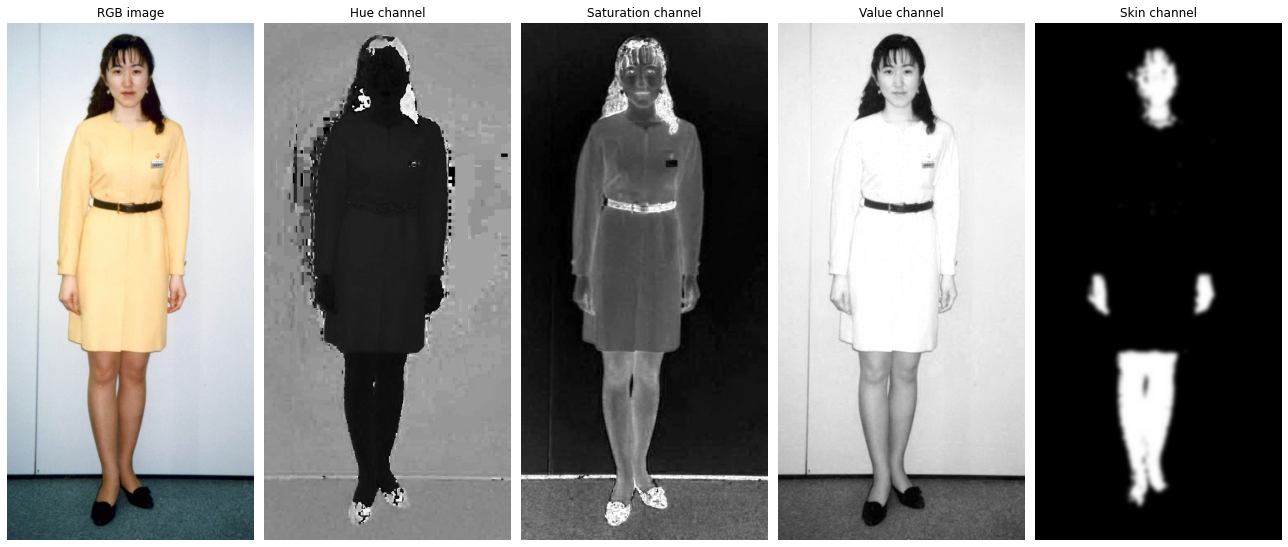

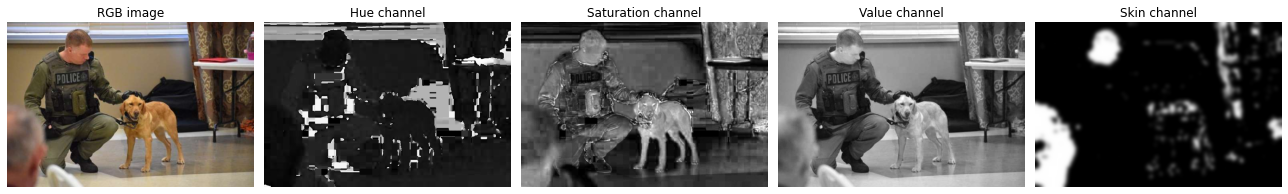

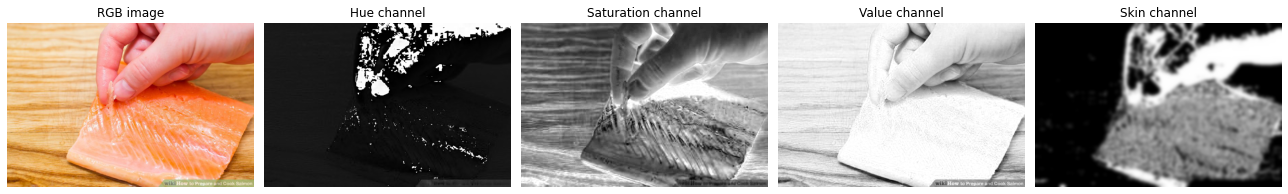

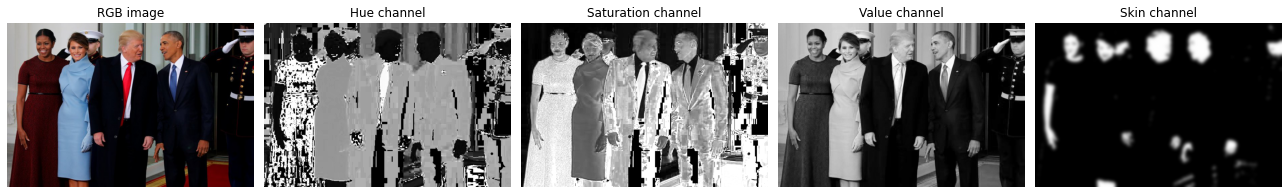

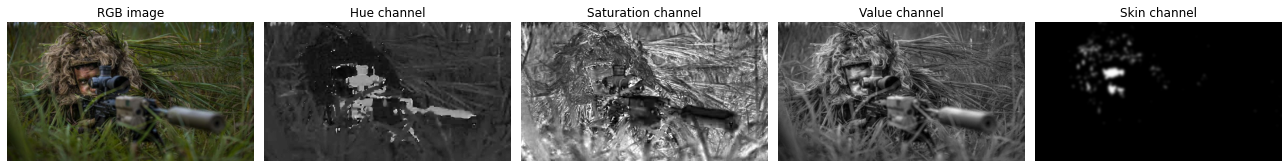

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage.color import rgb2hsv
from skimage import io
from scipy.ndimage.filters import gaussian_filter

links=['https://a.travel-assets.com/findyours-php/viewfinder/images/res40/191000/191408-Ipanema-Beach.jpg',\
       'https://upload.wikimedia.org/wikipedia/commons/0/03/Working_Uniform.jpg',\
       'https://img-s-msn-com.akamaized.net/tenant/amp/entityid/AAEoBYQ.img?h=414&w=620&m=6&q=60&o=f&l=f', \
       'https://www.wikihow.com/images/thumb/4/43/Prepare-and-Cook-Salmon-Step-5.jpg/aid1475325-v4-728px-Prepare-and-Cook-Salmon-Step-5.jpg', \
       'https://d.newsweek.com/en/full/545196/trump-inauguration-07-0120.jpg?w=737&f=aad8c3a9abb77e478e3f486e963f55c8',\
       'https://a57.foxnews.com/media2.foxnews.com/BrightCove/694940094001/2018/11/15/931/524/694940094001_5967519394001_5967518878001-vs.jpg?ve=1&tl=1']


for url in links:
  print(url)
  rgb_img = io.imread(url)
  print(rgb_img.shape)
  width, height = rgb_img.shape[:2]
  hsv_img = rgb2hsv(rgb_img)
  hue_img = hsv_img[:, :, 0]
  sat_img = hsv_img[:, :, 1]
  value_img = hsv_img[:, :, 2]

  fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, figsize=(18,12))

  ax0.imshow(rgb_img)
  ax0.set_title("RGB image")
  ax0.axis('off')
  
  
  ax1.imshow(hue_img, cmap='gray')
  ax1.set_title("Hue channel")
  ax1.axis('off')
  
  ax2.imshow(sat_img, cmap='gray')
  ax2.set_title("Saturation channel")
  ax2.axis('off')
  
  ax3.imshow(value_img, cmap='gray')
  ax3.set_title("Value channel")
  ax3.axis('off')
  
  bin_img = (hue_img > 0/255) & (hue_img < 20/255) & (sat_img > 48/255) & \
   (sat_img < 255/255) & (value_img > 80/255) & (value_img < 255/255)
  
 
  skin_img = np.zeros((width,height,3), dtype="uint8")
  skin_img[:,:,0] = bin_img * 255 # for red
  skin_img[:,:,1] = bin_img * 255 # for green
  skin_img[:,:,2] = bin_img * 255 # for blue
  
  skin_img = gaussian_filter(skin_img,sigma=5)
  
  ax4.imshow(skin_img, cmap='gray')
  ax4.set_title("Skin channel")
  ax4.axis('off')
  
  fig.tight_layout()

# Exercício sobre segmentação de imagens

Agora é a sua vez.

Utilizando o notebook anterior como ponto de partida, implemente uma função que receba a URL de uma foto de pessoa (de pé, de corpo inteiro e bem centralizada) e retorne a classificação dessa foto em 2 categorias: usando muita ou pouca roupa.

Sugestão: Comece pesquisando e montando uma base de dados com 10 exemplos de cada categoria. Salve as imagens no seu google drive para facilitar os testes. Para conseguir acessar, a partir do seu notebook, as imagens salvas no seu drive utilizando uma URL, siga [este tutorial](https://elfsight.com/blog/2018/02/how-to-upload-images-for-direct-url-in-google-drive/).

Exemplo de imagem:

![alt text](http://drive.google.com/uc?export=view&id=1hRdS38Yn9hvPmLI4awEnyVf7nobOP9n7)

Em seguida, implemente uma função auxiliar que calcula o percentual de pixels de pele em relação ao total de pixels da imagem. Use esse valor para decidir, por limiarização, a qual categoria uma imagem deve pertencer. 

Depois, utilize as 5 primeiras imagens de cada classe para efetuar testes e descobrir o melhor limiar de separação entre as classes.

Finalmente, implemente uma função auxliar para avaliar o desempenho de seu classificador nas 5 imagens restantes de cada categoria, computando o percentual de acerto. 

O que entregar: um notebook completo, contendo o código, comentários e o teste realizado sobre as imagens da base de dados armazenadas em seu google drive (com compartilhamento de link).




Abaixo encontra-se a função que retorna a quantidade de pontos interpretados como pele na matriz após a aplicação do filtro gaussiano. O valor utilizado como base para classificar um pixel como pele é o intervalo acima de 150. 

In [ ]:
def getSkinPercentage(skin_img,skin_treshold):
  count_skin = 0
  for row in np.arange(skin_img.shape[0]):
    for col in np.arange(skin_img.shape[1]):
      if skin_img[row,col] > 150:
        count_skin+=1
  return count_skin

Definindo os caminhos para as imagens:

In [ ]:
drive = ['https://drive.google.com/uc?id=1acWQKDZylupdd7sTcSOtZ_Jn3fcP5Agm','https://drive.google.com/uc?id=19O46gpAiZjqI8sq_nCCjD2pq00aykDBG',
         'https://drive.google.com/uc?id=1Hi5PnpMKZcah650QNnFXcRP5iqnPalRP','https://drive.google.com/uc?id=1ZMv-JrHXvUFwrt-Pcfh3Jy-ofWyGg9xU',
         'https://drive.google.com/uc?id=1F8Uwh61s0Krvva6WwHwt3Oq_Kt7aSERG','https://drive.google.com/uc?id=11fGAMF0UBTa_ytJZCA36OwiCkHrQ6j_w',
         'https://drive.google.com/uc?id=1LfcNmg0g6Uy7hz4JkAjkB1YJjGJuSQrA','https://drive.google.com/uc?id=1fmQdEKWAl4ZE6SyOeaNTZOKR08tzpLx0',
         'https://drive.google.com/uc?id=1l7KfY8nY3CESA-1RHbFJHoqBUX3Zdomt','https://drive.google.com/uc?id=1en-c8eVIFXtl02GkB-D4oGVyyy_2z_aF']

O laço que carrega cada uma das imagens e chama as funções de segmentação

Percentual de pele:  1.1617788461538463
Percentual de pele:  8.959134276241535
Percentual de pele:  7.010932343234323
Percentual de pele:  6.6334375
Percentual de pele:  10.987283950617284
Percentual de pele:  13.183
Percentual de pele:  30.490349206349205
Percentual de pele:  24.99646596858639
Percentual de pele:  34.388473731884055
Percentual de pele:  30.244039797259248


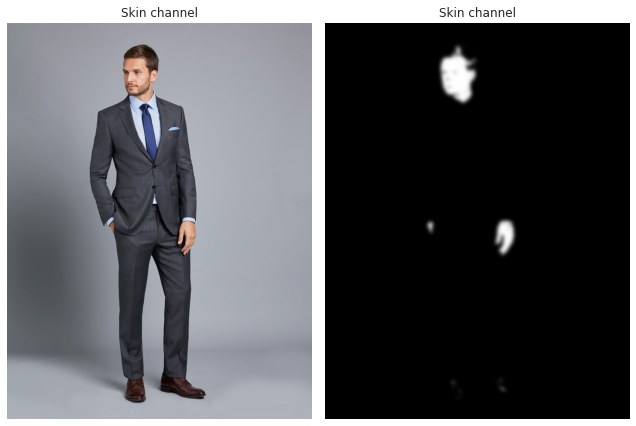

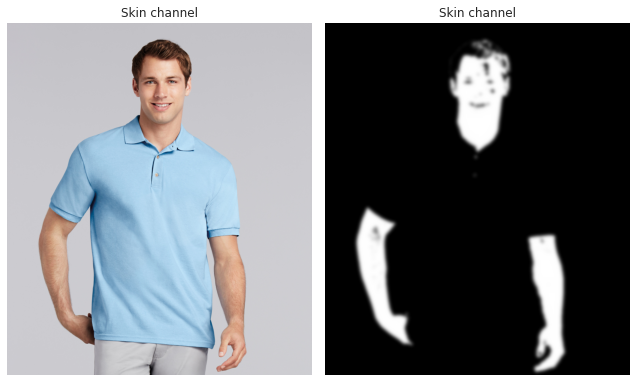

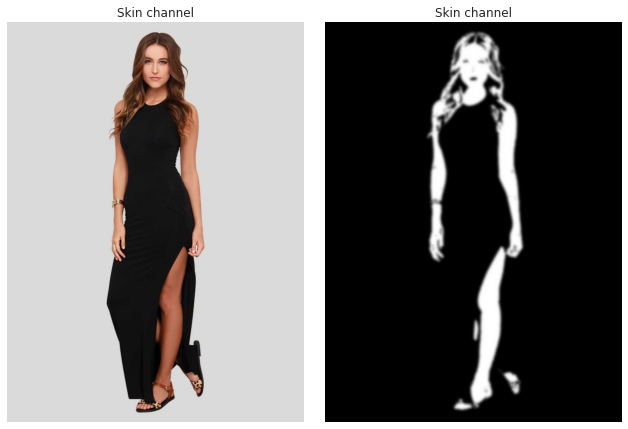

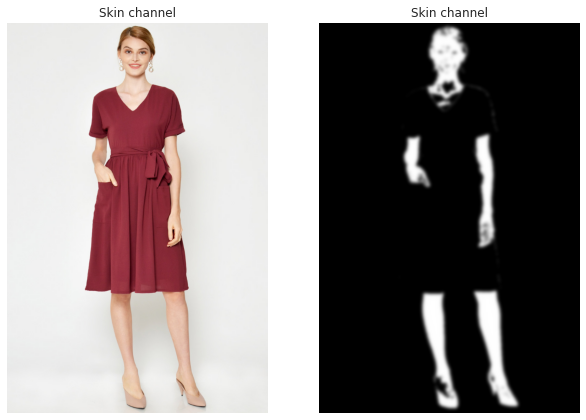

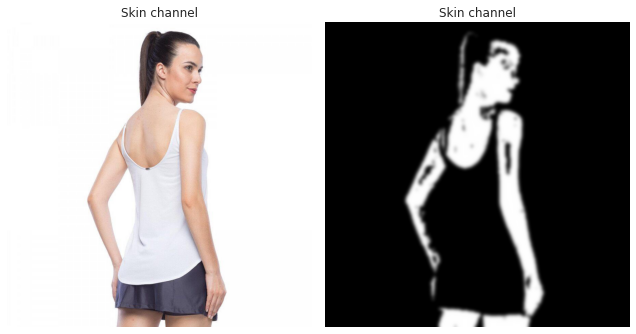

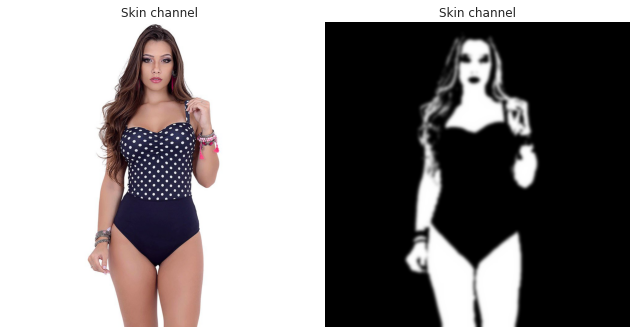

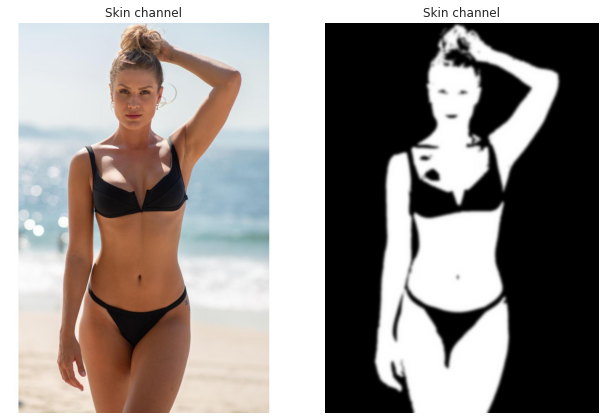

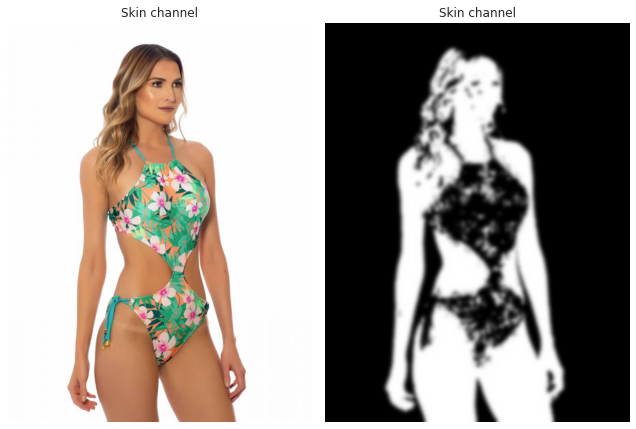

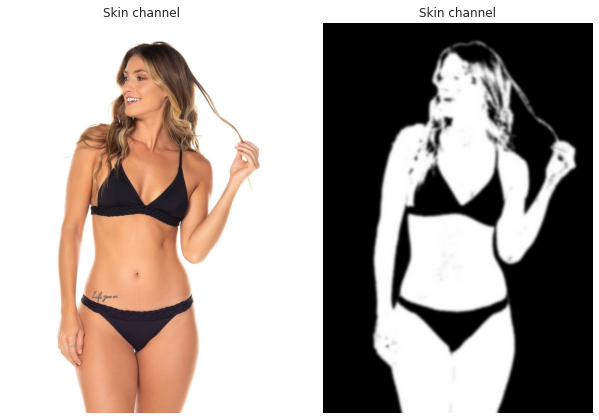

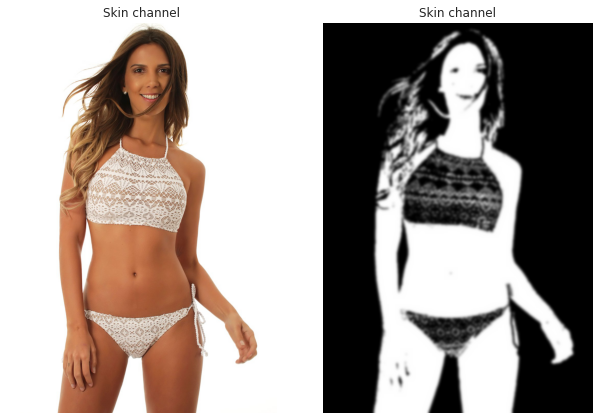

In [ ]:


skin_percentage = []

for url in range(len(drive)):
  fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9,6))
  rgb_img = io.imread(drive[url])
  width, height = rgb_img.shape[:2]

  hsv_img = rgb2hsv(rgb_img)
  hue_img = hsv_img[:, :, 0]
  sat_img = hsv_img[:, :, 1]
  value_img = hsv_img[:, :, 2]

  bin_img = (hue_img > 0/255) & (hue_img < 20/255) & (sat_img > 48/255) & \
    (sat_img < 255/255) & (value_img > 80/255) & (value_img < 255/255)
    
  ax0.imshow(rgb_img)
  ax0.set_title("Skin channel")
  ax0.axis('off')



  skin_img = np.zeros((width,height,3), dtype="uint8")
  skin_img[:,:,0] = bin_img * 255 # for red
  skin_img[:,:,1] = bin_img * 255 # for green
  skin_img[:,:,2] = bin_img * 255 # for blue
  skin_img = gaussian_filter(skin_img,sigma=5)

  

  ax1.imshow(skin_img, cmap='gray')
  ax1.set_title("Skin channel")
  ax1.axis('off')

  #print(skin_img[:,:,0])

  skin_treshold = 150
  count_skin = getSkinPercentage(skin_img[:,:,0],skin_treshold)
  print("Percentual de pele: ", count_skin/(width*height)*100)
  skin_percentage.append(count_skin/(width*height)*100)
  fig.tight_layout()



Acima encontram-se os valores de percentual de pele correspondentes às imagens. Criando um dataframe para facilitar a manipulação e a ordenação dos valores:

In [ ]:
import pandas as pd
from IPython.core.display import HTML

data = {'Link': drive,
        'Percentual': skin_percentage
        }
df = pd.DataFrame(data, columns = ['Link', 'Percentual'])
df['images'] = drive
df.head(10)
df.sort_values(by='Percentual', ascending=True)
df.drop(columns='images',axis=1,errors='ignore')

,Link,Percentual
0,https://drive.google.com/uc?id=1acWQKDZylupdd7sTcSOtZ_Jn3fcP5Agm,1.161779
1,https://drive.google.com/uc?id=19O46gpAiZjqI8sq_nCCjD2pq00aykDBG,8.959134
2,https://drive.google.com/uc?id=1Hi5PnpMKZcah650QNnFXcRP5iqnPalRP,7.010932
3,https://drive.google.com/uc?id=1ZMv-JrHXvUFwrt-Pcfh3Jy-ofWyGg9xU,6.633438
4,https://drive.google.com/uc?id=1F8Uwh61s0Krvva6WwHwt3Oq_Kt7aSERG,10.987284
5,https://drive.google.com/uc?id=11fGAMF0UBTa_ytJZCA36OwiCkHrQ6j_w,13.183000
6,https://drive.google.com/uc?id=1LfcNmg0g6Uy7hz4JkAjkB1YJjGJuSQrA,30.490349
7,https://drive.google.com/uc?id=1fmQdEKWAl4ZE6SyOeaNTZOKR08tzpLx0,24.996466
8,https://drive.google.com/uc?id=1l7KfY8nY3CESA-1RHbFJHoqBUX3Zdomt,34.388474
9,https://drive.google.com/uc?id=1en-c8eVIFXtl02GkB-D4oGVyyy_2z_aF,30.244040


Sendo assim, o treshold para classificar as imagens em duas categorias é 10.987%. Logo:

In [ ]:
def f(row):
    if row['Percentual'] > 10.99:
      return 'Pouca Roupa'
    else:
      return 'Muita Roupa'
df['Classificação'] = df.apply(f, axis=1)
df.drop(columns='images',axis=1,errors='ignore')
df

,Link,Percentual,images,Classificação
0,https://drive.google.com/uc?id=1acWQKDZylupdd7sTcSOtZ_Jn3fcP5Agm,1.161779,https://drive.google.com/uc?id=1acWQKDZylupdd7sTcSOtZ_Jn3fcP5Agm,Muita Roupa
1,https://drive.google.com/uc?id=19O46gpAiZjqI8sq_nCCjD2pq00aykDBG,8.959134,https://drive.google.com/uc?id=19O46gpAiZjqI8sq_nCCjD2pq00aykDBG,Muita Roupa
2,https://drive.google.com/uc?id=1Hi5PnpMKZcah650QNnFXcRP5iqnPalRP,7.010932,https://drive.google.com/uc?id=1Hi5PnpMKZcah650QNnFXcRP5iqnPalRP,Muita Roupa
3,https://drive.google.com/uc?id=1ZMv-JrHXvUFwrt-Pcfh3Jy-ofWyGg9xU,6.633438,https://drive.google.com/uc?id=1ZMv-JrHXvUFwrt-Pcfh3Jy-ofWyGg9xU,Muita Roupa
4,https://drive.google.com/uc?id=1F8Uwh61s0Krvva6WwHwt3Oq_Kt7aSERG,10.987284,https://drive.google.com/uc?id=1F8Uwh61s0Krvva6WwHwt3Oq_Kt7aSERG,Muita Roupa
5,https://drive.google.com/uc?id=11fGAMF0UBTa_ytJZCA36OwiCkHrQ6j_w,13.183000,https://drive.google.com/uc?id=11fGAMF0UBTa_ytJZCA36OwiCkHrQ6j_w,Pouca Roupa
6,https://drive.google.com/uc?id=1LfcNmg0g6Uy7hz4JkAjkB1YJjGJuSQrA,30.490349,https://drive.google.com/uc?id=1LfcNmg0g6Uy7hz4JkAjkB1YJjGJuSQrA,Pouca Roupa
7,https://drive.google.com/uc?id=1fmQdEKWAl4ZE6SyOeaNTZOKR08tzpLx0,24.996466,https://drive.google.com/uc?id=1fmQdEKWAl4ZE6SyOeaNTZOKR08tzpLx0,Pouca Roupa
8,https://drive.google.com/uc?id=1l7KfY8nY3CESA-1RHbFJHoqBUX3Zdomt,34.388474,https://drive.google.com/uc?id=1l7KfY8nY3CESA-1RHbFJHoqBUX3Zdomt,Pouca Roupa
9,https://drive.google.com/uc?id=1en-c8eVIFXtl02GkB-D4oGVyyy_2z_aF,30.244040,https://drive.google.com/uc?id=1en-c8eVIFXtl02GkB-D4oGVyyy_2z_aF,Pouca Roupa


O que faz sentido, já que a imagem de índice 4 no dataframe é a transição para as fotos de bíquini.